In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,NaN,0.47,NaN,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,NaN,NaN,0.53,0.22
3,0.58,0.44,0.57,NaN,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,NaN,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,NaN
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,NaN,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	185
float64		column 2	111
float64		column 3	111
float64		column 4	185
float64		column 5	222
float64		column 6	148
float64		column 7	148
float64		column 8	74


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1299.000000,1373.000000,1373.000000,1299.000000,1262.000000,1336.000000,1336.000000,1410.000000
mean,0.497891,0.499446,0.500998,0.258491,0.504754,0.007957,0.500052,0.275695
std,0.128962,0.120534,0.082976,0.131533,0.048543,0.078580,0.056098,0.105038
min,0.110000,0.130000,0.210000,0.050000,0.500000,0.000000,0.000000,0.010000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.310000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,0.990000


<AxesSubplot:>

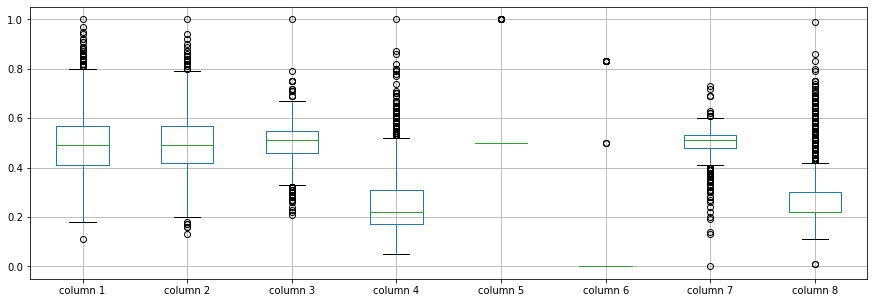

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.497891
column 2    0.499446
column 3    0.500998
column 4    0.258491
column 5    0.504754
column 6    0.007957
column 7    0.500052
column 8    0.275695
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.539943,-0.162107,0.168496,0.062721,0.007155,0.054022,-0.112278
column 2,0.539943,1.000000,-0.264882,0.156891,0.031078,0.020688,0.079738,-0.096228
column 3,-0.162107,-0.264882,1.000000,0.016531,-0.009854,0.009177,-0.147423,-0.020375
column 4,0.168496,0.156891,0.016531,1.000000,-0.016533,-0.028241,-0.076867,-0.039866
column 5,0.062721,0.031078,-0.009854,-0.016533,1.000000,-0.009445,0.032668,0.011507
column 6,0.007155,0.020688,0.009177,-0.028241,-0.009445,1.000000,0.023763,-0.039974
column 7,0.054022,0.079738,-0.147423,-0.076867,0.032668,0.023763,1.000000,0.072805
column 8,-0.112278,-0.096228,-0.020375,-0.039866,0.011507,-0.039974,0.072805,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+40,8+40+40,8+40+40+40,8+40+40+40+40,8+40+40+40+40+40,8+40+40+40+40+40+40,8+40+40+40+40+40,8+40+40+40+40,8+40+40+40,8+40+40,8+40,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.6240587700968203
Epoch: 1 , loss: 2.194140156973963
Epoch: 2 , loss: 2.0387729341569156
Epoch: 3 , loss: 1.9046442301377007
Epoch: 4 , loss: 1.7800550927286563
Epoch: 5 , loss: 1.7104578886343085
Epoch: 6 , loss: 1.6269511917363042
Epoch: 7 , loss: 1.5619487982729208
Epoch: 8 , loss: 1.4824874258559684
Epoch: 9 , loss: 1.4439595652663189
Epoch: 10 , loss: 1.3841742536296016
Epoch: 11 , loss: 1.3498190265634786
Epoch: 12 , loss: 1.3115922141334284
Epoch: 13 , loss: 1.2732489497765251
Epoch: 14 , loss: 1.2405133467653524
Epoch: 15 , loss: 1.2180814723605695
Epoch: 16 , loss: 1.1897302529086238
Epoch: 17 , loss: 1.1843811979760295
Epoch: 18 , loss: 1.1499240404885749
Epoch: 19 , loss: 1.1145588632511056
Epoch: 20 , loss: 1.1199183664892032
Epoch: 21 , loss: 1.1016570381496265
Epoch: 22 , loss: 1.0887001992567726
Epoch: 23 , loss: 1.0662183638500131
Epoch: 24 , loss: 1.0602758643419847
Epoch: 25 , loss: 1

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.430000
column 2    0.440000
column 3    0.480000
column 4    0.247562
column 5    0.500000
column 6    0.000000
column 7    0.510000
column 8    0.220000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,-0.175606,0.000000,0.094886,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,-0.204137,0.000079,0.0,0.000000
3,0.000000,0.000000,0.000000,0.138218,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
1479,-0.370876,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.414611
1481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1482,0.000000,0.000000,-0.083648,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.847613481171943, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.12467157515044731

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.434394,0.470000,0.224886,0.500000,0.000000,0.48,0.220000
1,0.430000,0.670000,0.480000,0.270000,0.500000,0.000000,0.53,0.220000
2,0.640000,0.620000,0.490000,0.150000,0.295863,0.000079,0.53,0.220000
3,0.580000,0.440000,0.570000,0.268218,0.500000,0.000000,0.54,0.220000
4,0.420000,0.440000,0.480000,0.540000,0.500000,0.000000,0.48,0.220000
...,...,...,...,...,...,...,...,...
1479,0.449124,0.630000,0.470000,0.180000,0.500000,0.000000,0.50,0.220000
1480,0.350000,0.290000,0.460000,0.140000,0.500000,0.000000,0.54,0.245389
1481,0.410000,0.470000,0.500000,0.140000,0.500000,0.000000,0.53,0.370000
1482,0.510000,0.450000,0.536352,0.250000,0.500000,0.000000,0.59,0.220000


In [20]:
imputations[-1].to_excel("Yeast_NN_10(imp).xlsx", index=False, header=False)